In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? 
Nothing done.


In [2]:
%run 'Functions.ipynb'
from sklearn.model_selection import train_test_split

/nfs/scistore08/kondrgrp/eputints/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [3]:
import plotly
plotly.tools.set_credentials_file(username='katyaputintseva', api_key='UisW1pWWAd9jSFWsm7rH')

ImportError: No module named plotly

In [8]:
def train_NN(data, labels):
    
    model = Sequential()

    init = initializers.Orthogonal(gain=1.0, seed=None)

    model.add(Dense(1, input_dim=data.shape[1], activation='sigmoid', kernel_initializer=init))
    model.add(Dense(100, activation='sigmoid', kernel_initializer=init))
    model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

    opt = optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)

    model.compile(optimizer=opt,
                  loss='mean_squared_error')

    hist = model.fit(data, labels, epochs=100, batch_size=400, shuffle=True)
    weights = model.layers[0].get_weights()[0]
    biases = model.layers[0].get_weights()[1]

    true = labels
    proba = model.predict_proba(data, batch_size=100)
    predicted = proba.flatten()

    fitness_potential = data.dot(weights) + biases[0]
    
    return true, predicted, fitness_potential

# 1. Single chunks

### 1.1. Single mutations features

In [9]:
chunk = 'S5'

data, labels, unique_mutations, aa_seq = read_data(chunk)

true_1, predicted_1, fitness_potential_1 = train_NN(data, labels)

Epoch 1/100
51122/51122 [==============================] - 0s - loss: 0.0283     
Epoch 2/100
51122/51122 [==============================] - 0s - loss: 0.0237     
Epoch 3/100
51122/51122 [==============================] - 0s - loss: 0.0200     
Epoch 4/100
51122/51122 [==============================] - 0s - loss: 0.0183     
Epoch 5/100
51122/51122 [==============================] - 0s - loss: 0.0172     
Epoch 6/100
51122/51122 [==============================] - 0s - loss: 0.0168     
Epoch 7/100
51122/51122 [==============================] - 0s - loss: 0.0166     
Epoch 8/100
51122/51122 [==============================] - 0s - loss: 0.0166     
Epoch 9/100
51122/51122 [==============================] - 0s - loss: 0.0166     
Epoch 10/100
51122/51122 [==============================] - 0s - loss: 0.0166     
Epoch 11/100
51122/51122 [==============================] - 0s - loss: 0.0165     
Epoch 12/100
51122/51122 [==============================] - 0s - loss: 0.0166     
Epoch 13/100


51122/51122 [==============================] - 0s - loss: 0.0157     
Epoch 100/100
49400/51122 [===========================>..] - ETA: 0s

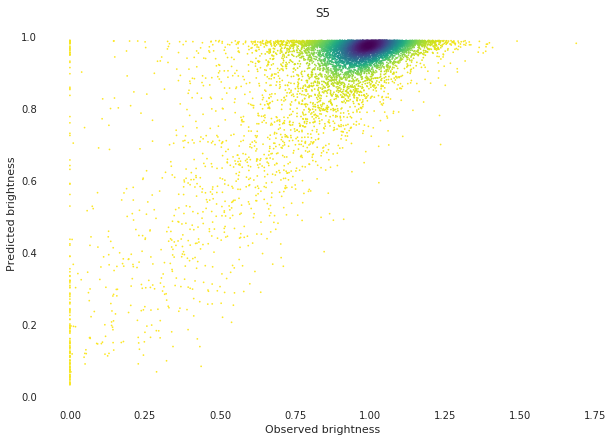

In [10]:
plt.figure(figsize = [10,7])
density_plot(true_1[:10000], predicted_1[:10000], chunk)

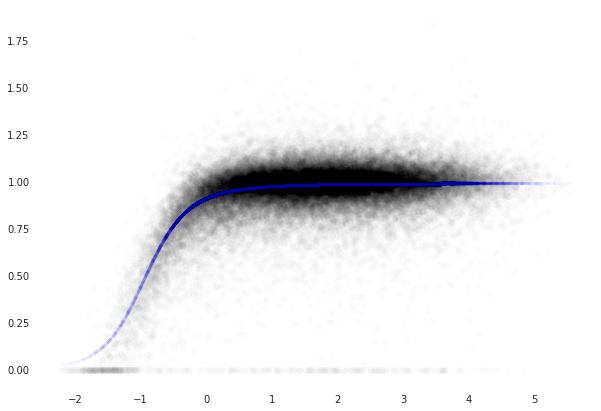

In [11]:
plt.figure(figsize = [10,7])
plt.plot(fitness_potential_1, true_1, 'ok', alpha = 0.01)
plt.plot(fitness_potential_1, predicted_1, '.b', alpha = 0.01);

In [12]:
slope, intercept, R_1, p_value, std_err = stats.linregress(true_1, predicted_1)
R_1

0.66201518448455965

### 1.2. Double mutations features

In [18]:
data, labels, combinations = read_data_doubles(chunk)

true_2, predicted_2, fitness_potential_2 = train_NN(data, labels)

Epoch 1/100
51122/51122 [==============================] - 0s - loss: 0.0128     
Epoch 2/100
51122/51122 [==============================] - 0s - loss: 0.0110     
Epoch 3/100
51122/51122 [==============================] - 0s - loss: 0.0103     
Epoch 4/100
51122/51122 [==============================] - 0s - loss: 0.0098     
Epoch 5/100
51122/51122 [==============================] - 0s - loss: 0.0093     
Epoch 6/100
51122/51122 [==============================] - 0s - loss: 0.0091     
Epoch 7/100
51122/51122 [==============================] - 0s - loss: 0.0088     
Epoch 8/100
51122/51122 [==============================] - 0s - loss: 0.0086     
Epoch 9/100
51122/51122 [==============================] - 0s - loss: 0.0085     
Epoch 10/100
51122/51122 [==============================] - 0s - loss: 0.0084     
Epoch 11/100
51122/51122 [==============================] - 0s - loss: 0.0083     
Epoch 12/100
51122/51122 [==============================] - 0s - loss: 0.0083     
Epoch 13/100


51122/51122 [==============================] - 0s - loss: 0.0081     
Epoch 100/100
46500/51122 [==========================>...] - ETA: 0s

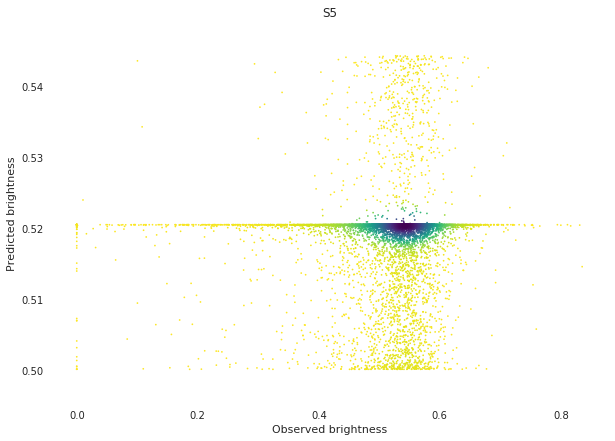

In [19]:
plt.figure(figsize = [10,7])
density_plot(true_2[:10000], predicted_2[:10000], chunk)

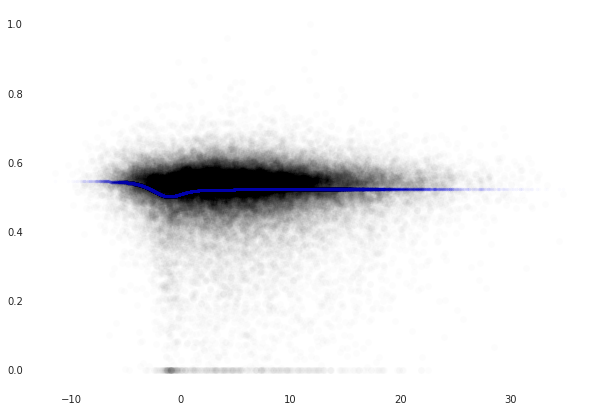

In [20]:
plt.figure(figsize = [10,7])
plt.plot(fitness_potential_2, true_2, 'ok', alpha = 0.01)
plt.plot(fitness_potential_2, predicted_2, '.b', alpha = 0.01);

In [ ]:
slope, intercept, R_2, p_value, std_err = stats.linregress(true_2, predicted_2)
R_2

0.084898463206608529

### 1.3. Triple mutations features

In [ ]:
data, labels = read_data_triples(chunk)

true_3, predicted_3, fitness_potential_3 = train_NN(data, labels)

Epoch 1/100
51122/51122 [==============================] - 1s - loss: 0.0126     
Epoch 2/100
51122/51122 [==============================] - 1s - loss: 0.0109     
Epoch 3/100
51122/51122 [==============================] - 1s - loss: 0.0102     
Epoch 4/100
51122/51122 [==============================] - 1s - loss: 0.0096     
Epoch 5/100
51122/51122 [==============================] - 1s - loss: 0.0093     
Epoch 6/100
51122/51122 [==============================] - 1s - loss: 0.0091     
Epoch 7/100
51122/51122 [==============================] - 1s - loss: 0.0088     
Epoch 8/100
51122/51122 [==============================] - 1s - loss: 0.0086     
Epoch 9/100
51122/51122 [==============================] - 1s - loss: 0.0085     
Epoch 10/100
51122/51122 [==============================] - 1s - loss: 0.0084     
Epoch 11/100
51122/51122 [==============================] - 1s - loss: 0.0084     
Epoch 12/100
51122/51122 [==============================] - 1s - loss: 0.0083     
Epoch 13/100


In [ ]:
plt.figure(figsize = [10,7])
density_plot(true_3[:10000], predicted_3[:10000], chunk)

In [ ]:
plt.figure(figsize = [10,7])
plt.plot(fitness_potential_3, true_3, 'ok', alpha = 0.01)
plt.plot(fitness_potential_3, predicted_3, '.b', alpha = 0.01);

In [ ]:
slope, intercept, R_3, p_value, std_err = stats.linregress(true_3, predicted_3)
R_3

### 1.4. Multidimensional plotting

In [238]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

import numpy as np


# adding surfaces to subplots.

trace1 = go.Scatter3d(
    x=fitness_potential_1[:5000],
    y=fitness_potential_2[:5000],
    z=true_2[:5000],
    mode='markers',
    marker=dict(
        size=3,
        opacity=0.2
    )
)


layout = go.Layout(title = chunk,
    scene = dict(
                    xaxis = dict(
                        title='Fitness potential, singles'),
                    yaxis = dict(
                        title='Fitness potential, doubles'),
                    zaxis = dict(
                        title='Fitness',),),
                    width=1000,
                    margin=dict(
                    r=30, l=30,
                    b=30, t=40)
)

fig = go.Figure(data=[trace1], layout=layout)
py.iplot(fig, filename='simple-3d-scatter')    